In [18]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [11]:
def load_video(video_path, resize_dim=(320, 240)):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        resized_frame = cv2.resize(frame, resize_dim)
        frames.append(resized_frame)

    cap.release()
    return frames


In [12]:
def convert_to_hsv(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

def noise_detection(frame):
    blurred = cv2.GaussianBlur(frame, (5, 5), 0)
    noise_mask = cv2.absdiff(frame, blurred)
    return noise_mask



In [13]:
def histogram_comparison(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0, 1], None, [256, 256], [0, 256, 0, 256])
    hist2 = cv2.calcHist([frame2], [0, 1], None, [256, 256], [0, 256, 0, 256])
    cv2.normalize(hist1, hist1, 0, 1, cv2.NORM_MINMAX)
    cv2.normalize(hist2, hist2, 0, 1, cv2.NORM_MINMAX)


    similarity_score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return similarity_score



In [14]:
def sobel_edge_detection(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edges = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(edges)



In [19]:
def find_least_similarity_cuts(similarity_scores, frames, top_n=5):
  
    least_similar_indices = np.argsort(similarity_scores)[:top_n]

    print(f"Top {top_n} scene cut frames (by least similarity):")
    
    for i, idx in enumerate(least_similar_indices):
        print(f"Scene cut {i+1}: between frame {idx} and frame {idx+1} with similarity score: {similarity_scores[idx]}")
 
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(frames[idx], cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {idx}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(frames[idx+1], cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {idx+1}")
        plt.axis('off')

        plt.show()

    return least_similar_indices



In [20]:
def process_video(video_path, hsv_directory, noise_directory, edge_directory, top_n_cuts=5, resize_dim=(320, 240)):
    if not os.path.exists(hsv_directory):
        os.makedirs(hsv_directory)
    if not os.path.exists(noise_directory):
         os.makedirs(noise_directory)
    if not os.path.exists(edge_directory):
         os.makedirs(edge_directory)

    frames = load_video(video_path, resize_dim=resize_dim)
    hsv_frames = []
    noise_frames = []
    edge_frames = []
    similarity_scores = []

    for idx, frame in enumerate(frames):
       
        hsv_frame = convert_to_hsv(frame)
        hsv_frames.append(hsv_frame)
        cv2.imwrite(os.path.join(hsv_directory, f'hsv_frame_{idx}.png'), hsv_frame)

        noise_frame = noise_detection(frame)
        noise_frames.append(noise_frame)
        cv2.imwrite(os.path.join(noise_directory, f'noise_frame_{idx}.png'), noise_frame)

        if idx > 0:
            similarity = histogram_comparison(frames[idx-1], frames[idx])
            similarity_scores.append(similarity)
            print(f'Similarity between frame {idx-1} and frame {idx}: {similarity}')

        edge_frame = sobel_edge_detection(frame)
        edge_frames.append(edge_frame)
        cv2.imwrite(os.path.join(edge_directory, f'edge_frame_{idx}.png'), edge_frame)

    if len(similarity_scores) > 0:
        least_similar_indices = find_least_similarity_cuts(similarity_scores, frames, top_n_cuts)

        for i, idx in enumerate(least_similar_indices):
            cv2.imwrite(os.path.join(hsv_directory, f'scene_cut_frame_{i+1}frame{idx}.png'), frames[idx])
            cv2.imwrite(os.path.join(hsv_directory, f'scene_cut_frame_{i+1}frame{idx+1}.png'), frames[idx+1])




Similarity between frame 0 and frame 1: 0.9899906943091642
Similarity between frame 1 and frame 2: 0.9902002979239505
Similarity between frame 2 and frame 3: 0.9890488766225338
Similarity between frame 3 and frame 4: 0.988575298174848
Similarity between frame 4 and frame 5: 0.9870252648312245
Similarity between frame 5 and frame 6: 0.9878676259052228
Similarity between frame 6 and frame 7: 0.9876540483431848
Similarity between frame 7 and frame 8: 0.9861163031014132
Similarity between frame 8 and frame 9: 0.9874881410840087
Similarity between frame 9 and frame 10: 0.989048844024219
Similarity between frame 10 and frame 11: 0.9863764328727636
Similarity between frame 11 and frame 12: 0.9720054820735201
Similarity between frame 12 and frame 13: 0.9904787525769629
Similarity between frame 13 and frame 14: 0.9886141323415838
Similarity between frame 14 and frame 15: 0.9866348646994982
Similarity between frame 15 and frame 16: 0.9895987477176154
Similarity between frame 16 and frame 17: 0.9

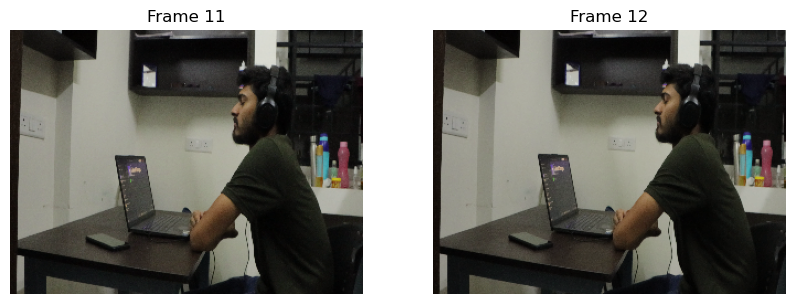

Scene cut 2: between frame 354 and frame 355 with similarity score: 0.9792412033071393


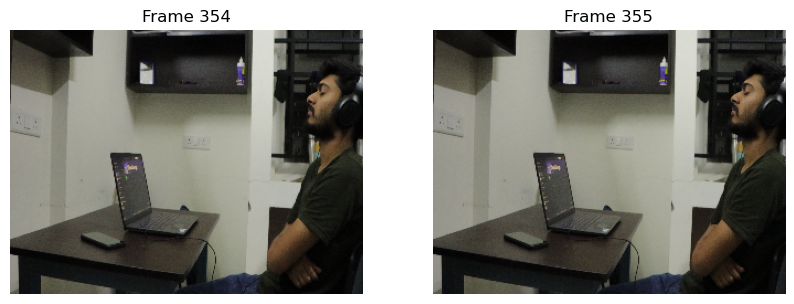

Scene cut 3: between frame 374 and frame 375 with similarity score: 0.9793686470689756


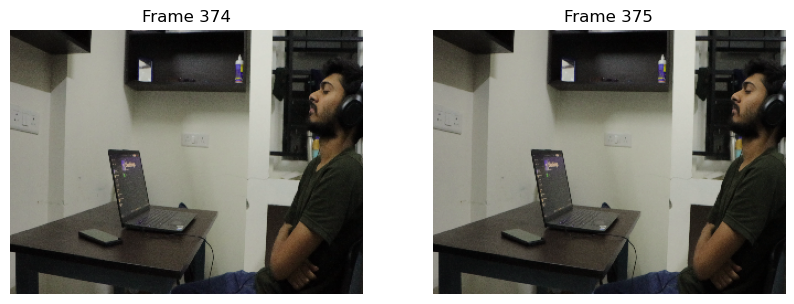

Scene cut 4: between frame 371 and frame 372 with similarity score: 0.9794521946815057


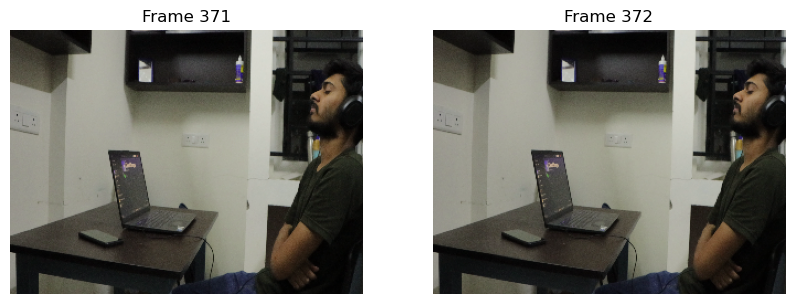

Scene cut 5: between frame 373 and frame 374 with similarity score: 0.9797262318496399


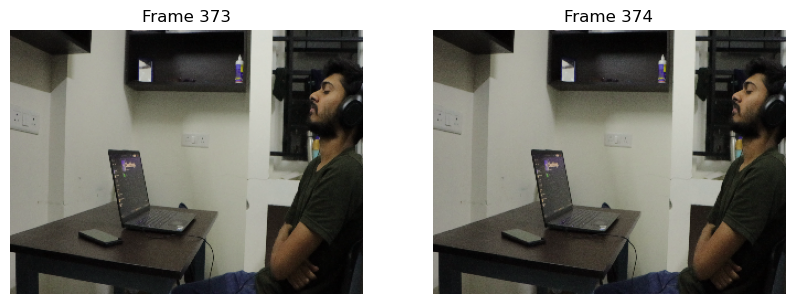

In [21]:
video_path = "C:/Users/sivalohit/OneDrive/Desktop/Short film/7.MP4"
hsv_directory = "C:/Users/sivalohit/Downloads/iva assignments/hsv_frames"
noise_directory = "C:/Users/sivalohit/Downloads/iva assignments/noise_frames"
edge_directory = "C:/Users/sivalohit/Downloads/iva assignments/edge_frames"
process_video(video_path, hsv_directory, noise_directory, edge_directory, top_n_cuts=5, resize_dim=(320, 240))